In [1]:
cd ..

/Users/AchilleTalon/Documents/GitHub/ice-in-caves


In [2]:
import lib.GNIP as gnip         #this module contains the plotter methods for the GNIP and ANIP datasets
import lib.isotopes as iso      #this custom module contains reader and plotter methods for the cave isotope transects
import numpy as np
from scipy import stats
import scipy as sp
import matplotlib.pyplot as plt

In [3]:
guf = iso.read_excel("../dat/samples_iso_guffert_01_11_2019.xlsx")
guf = guf.query('protocol != "CARBON"')
guf.dropna(inplace=True)
austria = gnip.csv_read("../dat/wiser_bulkdata_at.csv")

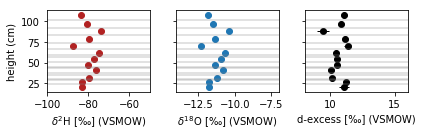

In [4]:
iso.transectPlotter(guf,{"Roman transect":1},
                    filename="../fig/isotopes/guf_lower_transect.pdf",
                    figsize = (6,15*120/900),
                   legend= False)

In [5]:
austria.index

MultiIndex(levels=[['APETLON', 'BRUCK AN DER LEITHA', 'DAMBOECKHAUS (SCHNEEBERG)', 'DONNERSKIRCHEN', 'GLOGGNITZ', 'GRAZ (UNIVERSITAET)', 'GUTENSTEIN', 'KLAGENFURT FLUGHAFEN', 'MOOSBRUNN', 'NEUSIEDL', 'PETZENKIRCHEN', 'PODERSDORF', 'VIENNA (HOHE WARTE)', 'VILLACHER ALPE'], [1960-01-15 00:00:00, 1960-02-15 00:00:00, 1960-03-15 00:00:00, 1960-04-15 00:00:00, 1960-05-15 00:00:00, 1960-06-15 00:00:00, 1960-07-15 00:00:00, 1960-08-15 00:00:00, 1960-09-15 00:00:00, 1960-10-15 00:00:00, 1960-11-15 00:00:00, 1960-12-15 00:00:00, 1961-01-15 00:00:00, 1961-02-15 00:00:00, 1961-03-15 00:00:00, 1961-04-15 00:00:00, 1961-05-15 00:00:00, 1961-06-15 00:00:00, 1961-07-15 00:00:00, 1961-08-15 00:00:00, 1961-09-15 00:00:00, 1961-10-15 00:00:00, 1961-11-15 00:00:00, 1961-12-15 00:00:00, 1962-01-15 00:00:00, 1962-02-15 00:00:00, 1962-03-15 00:00:00, 1962-04-15 00:00:00, 1962-05-15 00:00:00, 1962-06-15 00:00:00, 1962-07-15 00:00:00, 1962-08-15 00:00:00, 1962-09-15 00:00:00, 1962-10-15 00:00:00, 1962-11-15 0

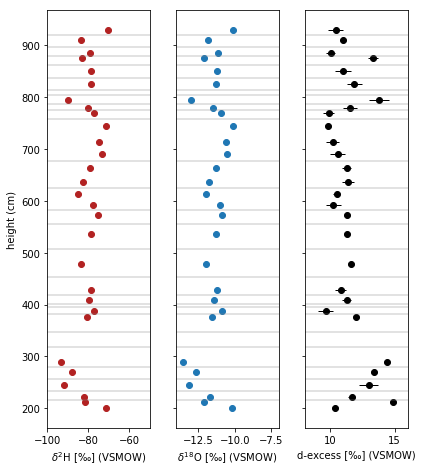

In [6]:

iso.transectPlotter(guf,{"LIA transect":2},
                    filename="../fig/isotopes/guf_upper_transect.pdf",
                    figsize = (6,15*400/900),
                   legend= False)

In [7]:
feuerkogel_long= gnip.ANIP_excel_read("../dat/Qualitätsdatenabfrage_20190826_1426.xlsx")

In [8]:
patscherkofel_long= gnip.ANIP_excel_read("../dat/Qualitätsdatenabfrage_20191105_1648.xlsx")

In [9]:
feuerkogel_long.loc["FEUERKOGEL"]['1981':'2002']['O18']

Date
1981-01-01   -13.96
1981-02-01   -12.35
1981-03-01   -11.24
1981-04-01   -13.09
1981-05-01   -12.01
1981-06-01   -11.04
1981-07-01   -12.16
1981-08-01   -10.62
1981-09-01   -10.97
1981-10-01   -13.75
1981-11-01   -13.40
1981-12-01   -17.67
1982-01-01   -14.41
1982-02-01   -15.78
1982-03-01   -12.96
1982-04-01   -10.11
1982-05-01   -12.49
1982-06-01   -10.25
1982-07-01    -8.70
1982-08-01    -9.44
1982-09-01    -9.56
1982-10-01   -15.01
1982-11-01   -19.45
1982-12-01   -14.75
1983-01-01   -11.61
1983-02-01   -15.80
1983-03-01   -12.87
1983-04-01   -13.57
1983-05-01   -14.79
1983-06-01    -9.43
              ...  
2000-07-01    -9.25
2000-08-01    -8.45
2000-09-01    -9.94
2000-10-01   -14.80
2000-11-01   -13.35
2000-12-01   -15.51
2001-01-01   -17.96
2001-02-01   -13.83
2001-03-01   -12.28
2001-04-01   -12.55
2001-05-01   -10.07
2001-06-01   -11.00
2001-07-01    -9.44
2001-08-01    -8.45
2001-09-01   -12.04
2001-10-01   -11.86
2001-11-01   -13.62
2001-12-01   -13.25
2002-01-01   -1

In [10]:
patscherkofel_long.loc["PATSCHERKOFEL"]['1981':'2002'].index

DatetimeIndex(['1981-01-01', '1981-02-01', '1981-03-01', '1981-04-01',
               '1981-05-01', '1981-06-01', '1981-07-01', '1981-08-01',
               '1981-09-01', '1981-10-01',
               ...
               '2002-03-01', '2002-04-01', '2002-05-01', '2002-06-01',
               '2002-07-01', '2002-08-01', '2002-09-01', '2002-10-01',
               '2002-11-01', '2002-12-01'],
              dtype='datetime64[ns]', name='Date', length=264, freq=None)

In [11]:
patscherkofel_long.loc['PATSCHERKOFEL']['1981':'2002'].head()

,End date,Precipitation,Temperature,O18,s.d. d18O,H2,s.d. d2H,H3,s.d. H3
Date,,,,,,,,,
1981-01-01,1981-01-31,100.0,-10.0,-18.24,NaN,-132.1,NaN,78.8,3.7
1981-02-01,1981-02-28,30.0,-8.9,-18.64,NaN,-137.2,NaN,96.3,4.5
1981-03-01,1981-03-31,45.0,-2.8,-17.45,NaN,-131.2,NaN,87.1,4.1
1981-04-01,1981-04-30,22.0,-0.9,-16.45,NaN,-119.5,NaN,101.0,4.7
1981-05-01,1981-05-31,98.0,2.0,-14.78,NaN,-107.2,NaN,74.4,3.5


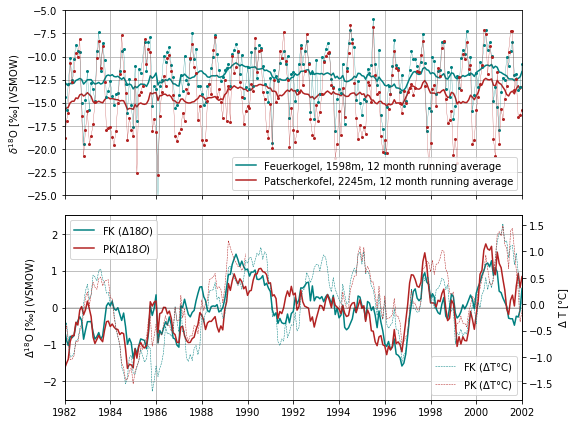

In [12]:
y1 = feuerkogel_long.loc['FEUERKOGEL']['O18'].dropna()
y2 = patscherkofel_long.loc['PATSCHERKOFEL']['O18'].dropna()
temp1 = feuerkogel_long.loc['FEUERKOGEL']['Temperature'].dropna()
temp2 = patscherkofel_long.loc['PATSCHERKOFEL']['Temperature'].dropna()


ynorm1=y1-y1.mean()
ynorm2=y2-y2.mean()
tnorm1=temp1-temp1.mean()
tnorm2=temp2-temp2.mean()

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,6),sharex=True)
ax1.plot(y1.rolling('365d').mean()['1982':'2002'],'-',color='teal',label='Feuerkogel, 1598m, 12 month running average')
ax1.plot(y2.rolling('365d').mean()['1982':'2002'],'-',color='firebrick',label='Patscherkofel, 2245m, 12 month running average')
ax1.legend()

ax1.plot(y1["1982":"2002"],'-o',linewidth= 0.25, markersize=2,color='teal',label='Feuerkogel, 1598m (monthly)')
ax1.plot(y2["1982":"2002"],'-o',linewidth= 0.25,markersize=2,color='firebrick',label='Patscherkogel, 2245m (monthly)')

ax1.grid()
ax1.set_ylim(-25,-5)
ax1.set_xlim("1982","2002")
ax1.set_ylabel("$\delta ^{18}$O [‰] (VSMOW)")


ax2.plot(ynorm1.rolling('365d').mean()['1982':'2002'],'-',color='teal', label="FK ($\Delta{18}O$)")
ax2.plot(ynorm2.rolling('365d').mean()['1982':'2002'],'-',color='firebrick',label="PK($\Delta{18}O$)")
ax3 = ax2.twinx()
ax3.plot(tnorm1.rolling('365d').mean()['1982':'2002'],'--',linewidth=0.5,color='teal', label="FK ($\Delta$T°C)")
ax2.legend(loc="upper left")


ax2.axhline(0,color='black',linewidth = 0.25)
ax3.plot(tnorm2.rolling('365d').mean()['1982':'1989'],'--',linewidth=0.5,color='firebrick', label='PK ($\Delta$T°C)')
ax3.legend(loc="lower right")


ax3.plot(tnorm2.rolling('365d').mean()['1994':'2002'],'--',linewidth=0.5,color='firebrick')
ax2.set_ylim(-2.5,2.5)
ax2.grid()
ax2.set_ylabel("$\Delta ^{18}$O [‰] (VSMOW)")
ax3.set_ylabel("$\Delta$ T [°C]")
plt.tight_layout()
plt.savefig("../fig/isotopes/long_term_trend_isotopes.pdf", dpi= 300)
plt.show()

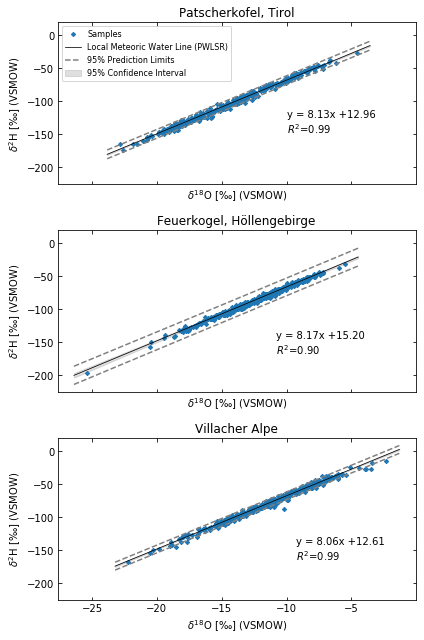

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize = (6,9),sharex=True,sharey=True)

ax1 = gnip.figure_LMWL(patscherkofel_long,'PATSCHERKOFEL',filename="../fig/GNIP/patscherkofel_long_LMWL.pdf",plot_title="Patscherkofel, Tirol",ax=ax1,legend ='on')
ax2 = gnip.figure_LMWL(feuerkogel_long,'FEUERKOGEL',filename="../fig/GNIP/feuerkogel_Long_LMWL.pdf",plot_title="Feuerkogel, Höllengebirge",ax = ax2)
ax3 = gnip.figure_LMWL(austria,'VILLACHER ALPE',filename="../fig/GNIP/feuerkogel_Long_LMWL.pdf",plot_title="Villacher Alpe",ax = ax3)


plt.subplots_adjust(hspace = 0.3)
plt.tight_layout()
plt.savefig("../fig/isotopes/weather_stations_adjusted.pdf",dpi=300)
plt.show()


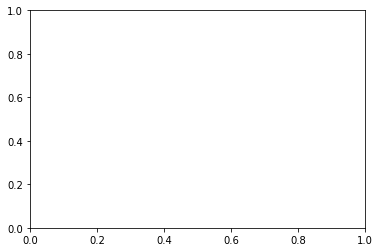

In [14]:
fig, ax = plt.subplots()
ax =ax1
plt.show()

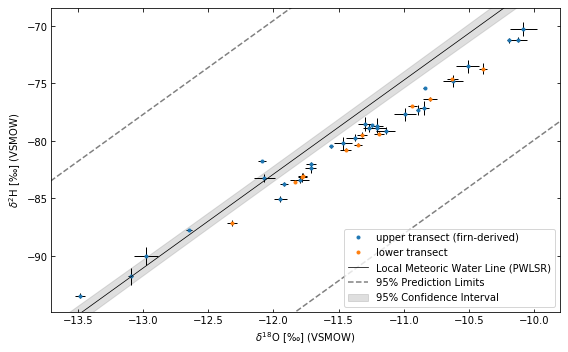

In [15]:
iso.full_plotter(guf,
                 {"upper transect (firn-derived)":2,"lower transect":1},
                 feuerkogel_long,
                 "FEUERKOGEL",
                 filename="../fig/isotopes/guf_feuerkogel_alpe_isotopes_ice.pdf",loc='best')

In [16]:
def OLSR(ax,pd,transect,colour,posxy):
    xi=np.arange(-50,20)
    slope, intercept, r_value, p_value, std_err = stats.linregress(pd.loc[transect]["d18O"],pd.loc[transect]["d2H"])
    ax.plot(xi,slope*xi+intercept,color=colour,linewidth=0.5)
    
    ax.text(posxy[0],posxy[1],"y={:.2f}x+{:.2f}\n $R^2={:.2f}$".format(slope,intercept,r_value),color=colour)
    return ax

(-9.0, -96.0)
(-9.0, -96.0)


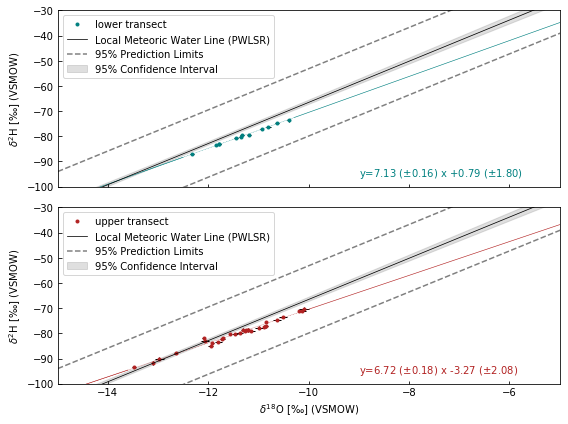

In [17]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,figsize= (8,6))

iso.IsoLSRPlotter(guf,
                 {"lower transect":1},
                 feuerkogel_long,
                 "FEUERKOGEL",ax=ax1,color='teal')
ax1.legend()
ax1.set_xlabel("")
iso.IsoLSRPlotter(guf,
                 {"upper transect":2},
                 feuerkogel_long,
                 "FEUERKOGEL",ax=ax2,color='firebrick')
ax2.legend()
plt.tight_layout()
plt.savefig("../fig/isotopes/guf_both_transects_figure.pdf",dpi=300)
plt.show()



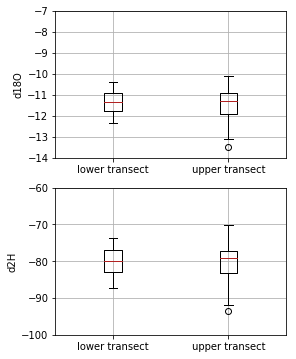

In [18]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize= (4,6))

bp1 = guf.loc[[1,2]].boxplot(by='transect',column= ["d18O"],ax = ax1,return_type='dict')
bp2 = guf.loc[[1,2]].boxplot(by='transect',column= ["d2H"],ax = ax2,return_type='dict')

ax1.set_ylabel("d18O")
for AX in (ax1,ax2):
    AX.set_title("")
    AX.set_xticklabels(labels=["lower transect","upper transect"])
    AX.set_xlabel("")
ax1.set_ylim(-14,-7)
ax2.set_ylabel("d2H")
ax2.set_ylim(-100,-60)

for bp in (bp1,bp2):
    [[item.set_color('firebrick') for item in bp[key]['medians']] for key in bp.keys()]
    [[item.set_color('black') for item in bp[key]['boxes']] for key in bp.keys()]
    [[item.set_color('black') for item in bp[key]['whiskers']] for key in bp.keys()]

plt.suptitle("")
plt.title("")
plt.savefig("../fig/isotopes/transect_boxplot_comparison_guffert.pdf", dpi = 300)
plt.show()

In [19]:
iso.get_stats(guf,{'cave ice':1})

,$\delta^{18}$O cave ice,$\delta^{2}$H cave ice,d-excess cave ice
maxi,-10.392985,-73.712699,11.333919
mean,-11.314520,-79.881102,10.635056
median,-11.337905,-79.895046,10.649901
mini,-12.315115,-87.187001,9.431177
std.,0.560940,3.999386,0.571880


In [20]:
iso.get_stats(guf,{'cave ice':2})

,$\delta^{18}$O cave ice,$\delta^{2}$H cave ice,d-excess cave ice
maxi,-10.082695,-70.262025,14.901049
mean,-11.458802,-80.218243,11.452177
median,-11.300340,-79.100528,11.266464
mini,-13.483252,-93.452419,9.635029
std.,0.855087,5.741932,1.404471


In [21]:
iso.get_stats_latex(guf,{'cave ice':2})

'\\begin{tabular}{rrr}\n\\toprule\n \\$\\textbackslash delta\\textasciicircum \\{18\\}\\$O cave ice &  \\$\\textbackslash delta\\textasciicircum \\{2\\}\\$H cave ice &  d-excess cave ice \\\\\n\\midrule\n              -10.082695 &              -70.262025 &          14.901049 \\\\\n              -11.458802 &              -80.218243 &          11.452177 \\\\\n              -11.300340 &              -79.100528 &          11.266464 \\\\\n              -13.483252 &              -93.452419 &           9.635029 \\\\\n                0.855087 &                5.741932 &           1.404471 \\\\\n\\bottomrule\n\\end{tabular}\n'